Predictive modelling using Decision tree regressor


In [1]:
import pandas as pd

In [4]:
raw_file_url = 'https://raw.githubusercontent.com/Dhaksa/PRASUNETHON-HACKATHON-/main/games_weather.csv'
data=pd.read_csv(raw_file_url)

In [5]:
data.head()

,game_id,Source,DistanceToStation,TimeMeasure,Temperature,DewPoint,Humidity,Precipitation,WindSpeed,WindDirection,Pressure,EstimatedCondition
0,2000090300,Meteostat,3.79,9/3/2000 12:00,80.96,73.04,77.0,0.000,3.36,200.0,29.8902,Clear
1,2000090300,Meteostat,3.79,9/3/2000 13:00,80.96,73.04,77.0,0.000,5.84,300.0,29.8784,Clear
2,2000090300,Meteostat,3.79,9/3/2000 14:00,82.94,73.04,72.0,0.000,5.84,260.0,29.8696,Clear
3,2000090300,Meteostat,3.79,9/3/2000 15:00,80.06,74.12,82.0,0.000,3.36,180.0,29.8578,Clear
4,2000090300,Meteostat,3.79,9/3/2000 16:00,75.02,75.02,100.0,0.728,4.72,280.0,29.8519,Heavy Rain


In [ ]:
data.columns

Index(['game_id', 'Source', 'DistanceToStation', 'TimeMeasure', 'Temperature',
       'DewPoint', 'Humidity', 'Precipitation', 'WindSpeed', 'WindDirection',
       'Pressure', 'EstimatedCondition'],
      dtype='object')

In [ ]:
import missingno as msno
data.isnull().sum()

game_id                  0
Source                   0
DistanceToStation     1643
TimeMeasure              0
Temperature              1
DewPoint                 1
Humidity                 1
Precipitation         2568
WindSpeed                1
WindDirection         4771
Pressure                21
EstimatedCondition    2568
dtype: int64

In [ ]:

data.select_dtypes(include=(['int64','float64'])).isna().sum()
df_num_col=data.select_dtypes(include=(['int64','float64'])).columns
for c in df_num_col:
  data[c].fillna(data[c].mean(),inplace=True)
data.select_dtypes(include=(['int64','float64'])).isna().sum()

game_id              0
DistanceToStation    0
Temperature          0
DewPoint             0
Humidity             0
Precipitation        0
WindSpeed            0
WindDirection        0
Pressure             0
dtype: int64

In [ ]:
data.select_dtypes(include=(['object'])).isna().sum()
df_num_col=data.select_dtypes(include=(['object'])).columns
for c in df_num_col:
  data[c].fillna(data[c].mode().values[0],inplace=True)
data.select_dtypes(include=(['object'])).isna().sum()

Source                0
TimeMeasure           0
EstimatedCondition    0
dtype: int64

In [ ]:
data.dtypes

game_id                 int64
Source                 object
DistanceToStation     float64
TimeMeasure            object
Temperature           float64
DewPoint              float64
Humidity              float64
Precipitation         float64
WindSpeed             float64
WindDirection         float64
Pressure              float64
EstimatedCondition     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Source'] = label_encoder.fit_transform(data['Source'])
data['EstimatedCondition'] = label_encoder.fit_transform(data['EstimatedCondition'])


In [ ]:
data.head()

,game_id,Source,DistanceToStation,TimeMeasure,Temperature,DewPoint,Humidity,Precipitation,WindSpeed,WindDirection,Pressure,EstimatedCondition
0,2000090300,0,3.79,9/3/2000 12:00,80.96,73.04,77.0,0.000,3.36,200.0,29.8902,0
1,2000090300,0,3.79,9/3/2000 13:00,80.96,73.04,77.0,0.000,5.84,300.0,29.8784,0
2,2000090300,0,3.79,9/3/2000 14:00,82.94,73.04,72.0,0.000,5.84,260.0,29.8696,0
3,2000090300,0,3.79,9/3/2000 15:00,80.06,74.12,82.0,0.000,3.36,180.0,29.8578,0
4,2000090300,0,3.79,9/3/2000 16:00,75.02,75.02,100.0,0.728,4.72,280.0,29.8519,1


In [ ]:
import pandas as pd
data['TimeMeasure'] = pd.to_datetime(data['TimeMeasure'])
data['year'] = data['TimeMeasure'].dt.year
data['month'] = data['TimeMeasure'].dt.month
data['day'] = data['TimeMeasure'].dt.day
data['hour'] = data['TimeMeasure'].dt.hour
data['minute'] = data['TimeMeasure'].dt.minute
data['second'] = data['TimeMeasure'].dt.second
data.drop(columns=['TimeMeasure'], inplace=True)
print(data.head())

      game_id  Source  DistanceToStation  Temperature  DewPoint  Humidity  \
0  2000090300       0               3.79        80.96     73.04      77.0   
1  2000090300       0               3.79        80.96     73.04      77.0   
2  2000090300       0               3.79        82.94     73.04      72.0   
3  2000090300       0               3.79        80.06     74.12      82.0   
4  2000090300       0               3.79        75.02     75.02     100.0   

   Precipitation  WindSpeed  WindDirection  Pressure  EstimatedCondition  \
0          0.000       3.36          200.0   29.8902                   0   
1          0.000       5.84          300.0   29.8784                   0   
2          0.000       5.84          260.0   29.8696                   0   
3          0.000       3.36          180.0   29.8578                   0   
4          0.728       4.72          280.0   29.8519                   1   

   year  month  day  hour  minute  second  
0  2000      9    3    12       0   

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=['game_id','EstimatedCondition'])
y = data['EstimatedCondition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.columns

Index(['Source', 'DistanceToStation', 'Temperature', 'DewPoint', 'Humidity',
       'Precipitation', 'WindSpeed', 'WindDirection', 'Pressure', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [ ]:
y.value_counts()

EstimatedCondition
0    34320
2     2138
3      347
4      271
1       68
5       11
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0,max_depth=5)
regressor.fit(x_train, y_train)
Y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm = confusion_matrix(y_test, Y_pred)
print('confusion matrix',cm)
ac=accuracy_score(y_test, Y_pred)
print('accuracy',ac)

confusion matrix [[10291     0     0     0     0     0]
 [    0    17     0     0     1     0]
 [    0     0   662     0     0     0]
 [    0     0     0   105     0     0]
 [    0     0     0     0    69     0]
 [    0     0     0     0     0     2]]
accuracy 0.999910289764062


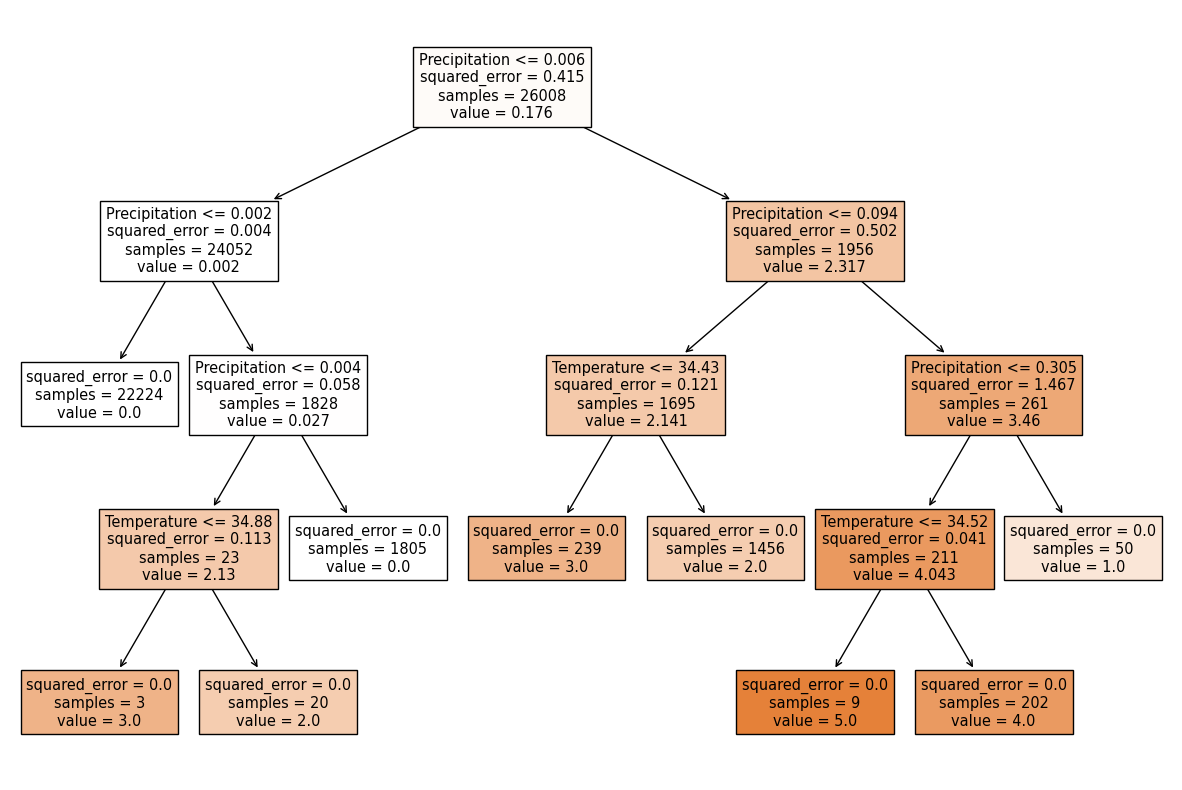

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=x.columns)
plt.show()


Anamoly detection using Random Forest


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d currie32/crimes-in-chicago

Dataset URL: https://www.kaggle.com/datasets/currie32/crimes-in-chicago
License(s): unknown
 97% 454M/467M [00:07<00:00, 43.7MB/s]
100% 467M/467M [00:07<00:00, 61.5MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('crimes-in-chicago.zip', 'r') as zip_ref:
    zip_ref.extractall('crimes-in-chicago')


In [ ]:
dataset=pd.read_csv("/content/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv")

In [ ]:
dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
import missingno as msno
dataset.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [ ]:

dataset.select_dtypes(include=(['int64','float64'])).isna().sum()
df_num_col=dataset.select_dtypes(include=(['int64','float64'])).columns
for c in df_num_col:
  dataset[c].fillna(dataset[c].mean(),inplace=True)
dataset.select_dtypes(include=(['int64','float64'])).isna().sum()

Unnamed: 0        0
ID                0
Beat              0
District          0
Ward              0
Community Area    0
X Coordinate      0
Y Coordinate      0
Year              0
Latitude          0
Longitude         0
dtype: int64

In [ ]:

dataset.select_dtypes(include=(['object'])).isna().sum()
df_num_col=dataset.select_dtypes(include=(['object'])).columns
for c in df_num_col:
  dataset[c].fillna(dataset[c].mode().values[0],inplace=True)
dataset.select_dtypes(include=(['object'])).isna().sum()

Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
FBI Code                0
Updated On              0
Location                0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Primary Type'] = label_encoder.fit_transform(dataset['Primary Type'])
dataset['Location Description'] = label_encoder.fit_transform(dataset['Location Description'])
dataset['Description'] = label_encoder.fit_transform(dataset['Description'])
dataset['Case Number'] = label_encoder.fit_transform(dataset['Case Number'])
dataset['Block'] = label_encoder.fit_transform(dataset['Block'])
dataset['IUCR'] = label_encoder.fit_transform(dataset['IUCR'])
dataset['FBI Code'] = label_encoder.fit_transform(dataset['FBI Code'])
dataset['Location'] = label_encoder.fit_transform(dataset['Location'])

In [ ]:
#dataset.drop(columns=['Updated On'], inplace=True)
#dataset.drop(columns=['Unnamed: 0'], inplace=True)
#dataset.drop(columns=['Date'],inplace=True)
print(dataset.head(2))

         ID  Case Number  Block  IUCR  Primary Type  Description  \
0  10508693      1259930   6521    51             2          120   
1  10508695      1259874  24531    51             2          120   

   Location Description  Arrest  Domestic  Beat  District  Ward  \
0                    17    True      True  1022      10.0  24.0   
1                   111   False      True   313       3.0  20.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate  Year   Latitude  \
0            29.0        10     1154907.0     1893681.0  2016  41.864073   
1            42.0        10     1183066.0     1864330.0  2016  41.782922   

   Longitude  Location  
0 -87.706819    192925  
1 -87.604363    118610  


In [ ]:
dataset.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset[['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location']]
y = dataset['Arrest']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix',cm)
ac=accuracy_score(y_test, y_pred)
print('accuracy',ac)


confusion matrix [[312666  11083]
 [ 38736  74530]]
accuracy 0.8860016246581925


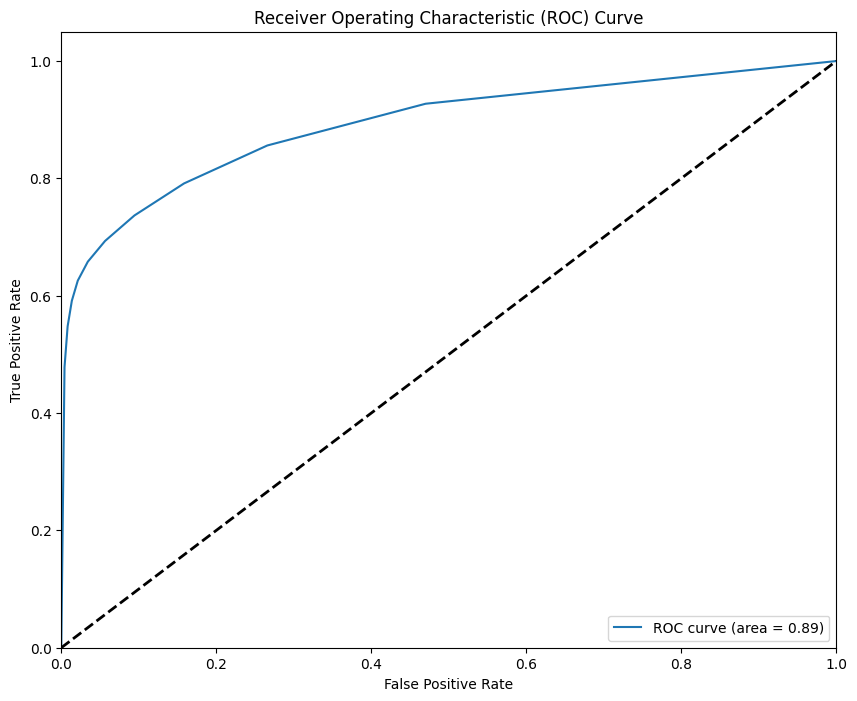

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.multiclass import OneVsRestClassifier

y_score = classifier.predict_proba(x_test)[:, 1]
n_classes = len(np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()

# Treat this as a binary classification problem
fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

plt.figure(figsize=(10, 8))

plt.plot(fpr[0], tpr[0], label='ROC curve (area = {0:0.2f})'
                               .format(roc_auc[0]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()